<a href="https://colab.research.google.com/github/kannan-42/kannan-code/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

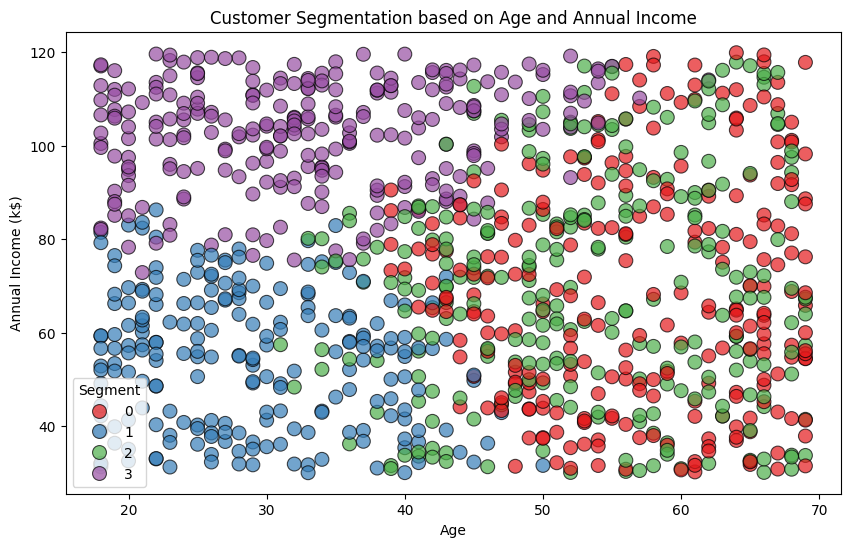

               Age           Annual Income (k$)            Spending Score  \
              mean       std               mean        std           mean   
Segment                                                                     
0        56.822394  8.404463          68.606718  24.262310      23.274131   
1        28.925581  7.768499          54.395144  14.476681      39.046512   
2        53.147601  9.561128          70.418284  23.765519      78.147601   
3        33.254902  9.952729         102.649016  11.215860      48.650980   

                    
               std  
Segment             
0        14.416229  
1        24.950936  
2        13.287992  
3        27.011950  
   Age  Annual Income (k$)  Spending Score  Segment  \
0   56              64.674              58        2   
1   69              65.854              12        0   
2   46              76.271               3        0   
3   32             103.688              18        3   
4   60              68.518            

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Simulated Customer Data
np.random.seed(42)

n_customers = 1000
age = np.random.randint(18, 70, size=n_customers)  # Age between 18 and 70
annual_income = np.random.randint(30000, 120000, size=n_customers)  # Income between 30k and 120k
spending_score = np.random.randint(1, 100, size=n_customers)  # Spending score between 1 and 100

# Create a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Annual Income (k$)': annual_income / 1000,  # In thousands for simplicity
    'Spending Score': spending_score
})

# Step 2: Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score']])

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Let's assume 4 segments
df['Segment'] = kmeans.fit_predict(df_scaled)

# Step 4: Visualize the Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Segment', data=df, palette='Set1', s=100, alpha=0.7, edgecolor='black')
plt.title('Customer Segmentation based on Age and Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Segment')
plt.show()

# Step 5: Analyze the Segments
print(df.groupby('Segment').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score': ['mean', 'std']
}))

# Step 6: Personalization Based on Segments
def personalize_offer(segment):
    if segment == 0:
        return "Offer: 10% discount on premium products"
    elif segment == 1:
        return "Offer: 15% discount on basic products"
    elif segment == 2:
        return "Offer: Free shipping on all orders"
    elif segment == 3:
        return "Offer: 20% discount on high-end electronics"
    else:
        return "Offer: Special loyalty points for your next purchase"

# Example: Personalize an offer for a customer from each segment
df['Personalized Offer'] = df['Segment'].apply(personalize_offer)

# Show the personalized offers for a few customers
print(df[['Age', 'Annual Income (k$)', 'Spending Score', 'Segment', 'Personalized Offer']].head(10))
